In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Tesla_accident = pd.read_csv('Tesla Deaths.csv')

Tesla_df = Tesla_accident.iloc[:273,[1,2,6,7,8,9,10,11,13,14,15]]
Tesla_df['Date'] = pd.to_datetime(Tesla_df['Date'], infer_datetime_format=True)
Tesla_df = Tesla_df.replace(' - ', '0')
Tesla_df = Tesla_df.fillna(0)
Tesla_df = Tesla_df.astype({'Year':'int', 'Deaths':'int', 'Tesla driver':'int', 'Tesla occupant':'int',
                            'Other vehicle':'int', 'Cyclists / Peds':'int', 'TSLA+cycl / peds':'int',
                            'Autopilot claimed':'int', 'Verified Tesla Autopilot Death':'int', 'Verified Tesla Autopilot Death + Death Reported to NHTSA SGO':'int',})

Tesla_df

,Year,Date,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists / Peds,TSLA+cycl / peds,Autopilot claimed,Verified Tesla Autopilot Death,Verified Tesla Autopilot Death + Death Reported to NHTSA SGO
0,2022,2022-10-19,1,1,0,0,0,1,0,0,0
1,2022,2022-10-18,4,1,1,2,0,2,0,0,0
2,2022,2022-10-12,1,1,0,0,0,1,0,0,0
3,2022,2022-10-09,1,0,1,0,0,1,0,0,0
4,2022,2022-10-01,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
268,2014,2014-07-14,1,0,0,1,0,0,0,0,0
269,2014,2014-07-04,1,1,0,0,0,1,0,0,0
270,2014,2014-07-04,3,0,0,3,0,0,0,0,0
271,2013,2013-11-02,1,0,0,0,1,1,0,0,0


In [ ]:
Tesla_year_df = Tesla_df.groupby(Tesla_df['Year'])
Tesla_year_sum = Tesla_year_df.sum()
Tesla_year_sum = Tesla_year_sum.reset_index()

Tesla_year_sum

,Year,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists / Peds,TSLA+cycl / peds,Autopilot claimed,Verified Tesla Autopilot Death,Verified Tesla Autopilot Death + Death Reported to NHTSA SGO
0,2013,3,0,0,2,1,1,0,0,0
1,2014,6,2,0,4,0,2,0,0,0
2,2015,5,4,0,0,1,5,0,0,0
3,2016,16,5,2,6,3,10,2,2,2
4,2017,11,2,0,7,2,4,0,0,0
5,2018,21,8,7,5,1,16,2,2,2
6,2019,50,11,6,26,6,23,9,7,7
7,2020,47,13,6,22,6,23,6,2,3
8,2021,75,28,11,22,8,50,4,1,1
9,2022,95,34,12,30,14,63,12,2,10


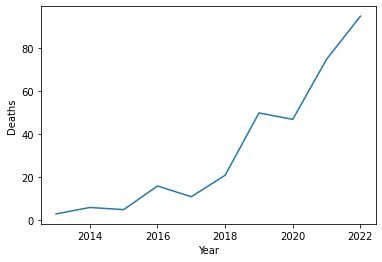

In [ ]:
plt.plot(Tesla_year_sum['Year'], Tesla_year_sum['Deaths'])
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.show()

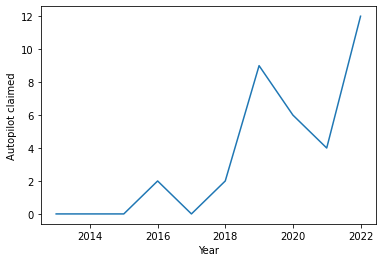

In [ ]:
plt.plot(Tesla_year_sum['Year'], Tesla_year_sum['Autopilot claimed'])
plt.xlabel('Year')
plt.ylabel('Autopilot claimed')
plt.show()

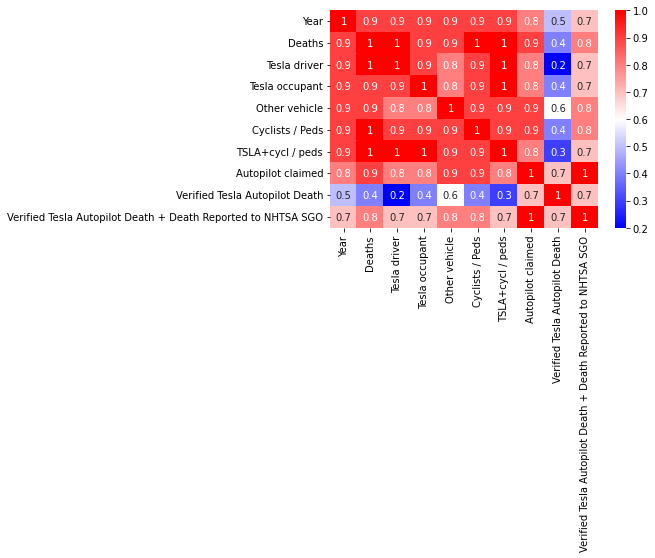

In [ ]:
correlation_matrix = Tesla_year_sum.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap="bwr")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = Tesla_year_sum.iloc[:, [0,2,3,4,5,6,7,8,9]]
Y = Tesla_year_sum.iloc[:, [1]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.7)
Linear_Reg = LinearRegression()
Linear_Reg.fit(X_train, Y_train)

Y_pred = Linear_Reg.predict(X_test)
RMSE = (np.sqrt(mean_squared_error(Y_test, Y_pred)))

print("RMSE is ", RMSE)

RMSE is  5.434233935589582


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = Tesla_year_sum.iloc[:, [0,2,3,4,5,6,7,8,9]]
Y = Tesla_year_sum.iloc[:, [1]]

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X2 = poly_features.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size = 0.7)

Linear_Reg2 = LinearRegression()
Linear_Reg2.fit(X_train, Y_train)

Y_pred = Linear_Reg2.predict(X_test)
RMSE = (np.sqrt(mean_squared_error(Y_test, Y_pred)))

print("RMSE is ", RMSE)

RMSE is  2.7947443493754287
